# Boston House Price Prediction


### Dataset:
https://www.kaggle.com/altavish/boston-housing-dataset?select=HousingData.csv

### Summary:
The Boston housing dataset contains 506 observations and 14 variables. The dataset contains missing values.

### Variables:

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- BLACK    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population

- MEDV     Median value of owner-occupied homes in $1000's  (Target Variable)

Author: Steven Ponce

Date: Mar 16, 2021


# Import Libraries


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.8.3


# Loading the data

In [2]:
df = pd.read_csv("Boston house price prediction.csv")
df.drop(columns=['ID'], axis=0, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Data Processing

In [3]:
def quick_analysis(df):
       
    print('\n 1. Dataset Information:')
    print('-'*40)
    print(df.info()) 
    
    print('\n 2. Number of Rows and Columns:', df.shape)
    print('-'*40)

    print('\n 3. Null Values:')
    print('-'*40)
    print(df.isnull().sum())
      
    return quick_analysis
    raise NotImplementedError()
              

In [4]:
quick_analysis(df);


 1. Dataset Information:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

 2. Number of Rows and Columns: (506, 14)
----------------------------------------

 3. Null Values:
----------------------------------------
crim       0
zn     

In [5]:
# Remaming Target Variable 'medv' to 'price'
df.rename(columns={'medv':'price'}, inplace=True )

# Descriptive Statistics

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Exploratory Data Analysis

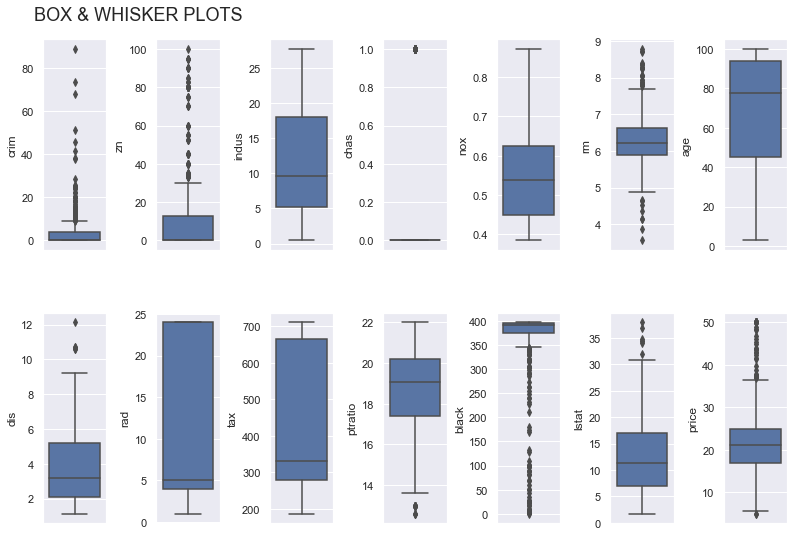

In [7]:
# Check for outliers

sns.set_theme()
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(12,8))

index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

plt.tight_layout(pad=3.5, w_pad=0.7, h_pad=5.0)
fig.suptitle('BOX & WHISKER PLOTS\n', fontsize=18, x=0.2)
plt.show()


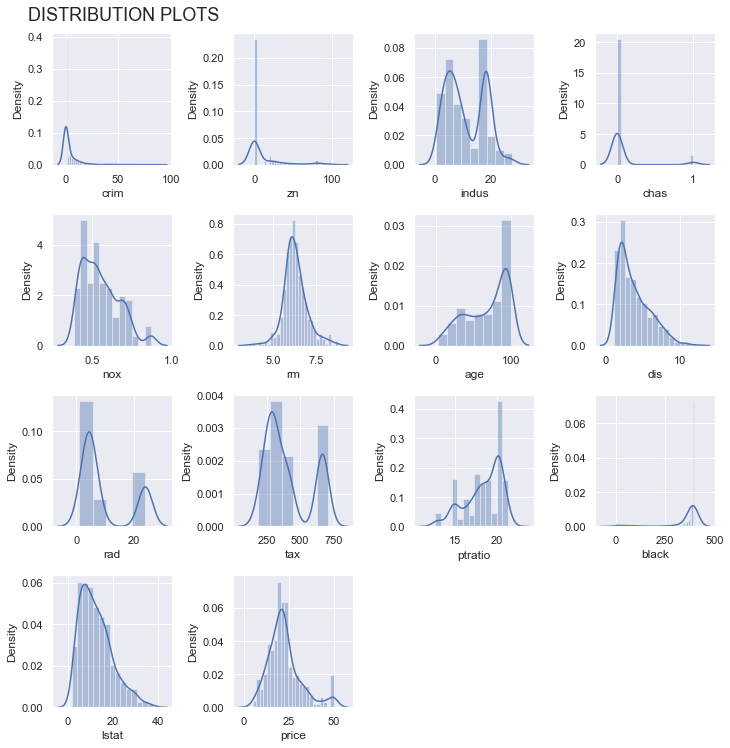

In [8]:
# distribution plots

sns.set_theme()
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(11,11))

index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

ax[14].set_visible(False)
ax[15].set_visible(False)

plt.tight_layout(pad=3.5, w_pad=0.7, h_pad=1.0)
fig.suptitle('DISTRIBUTION PLOTS\n', fontsize=18, x=0.2)
plt.show()


# Normalization

In [9]:
'''
Min-Max normalization - for every feature, the minimum value of that feature gets transformed into a 0, 
the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.
'''

cols = ['crim', 'zn', 'tax', 'black']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)
    

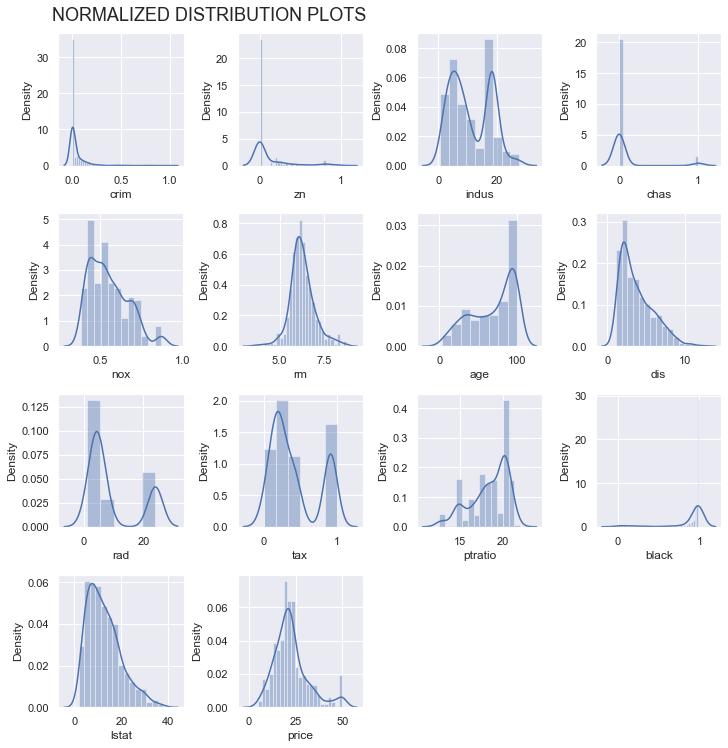

In [10]:
# Updated distribution plots with Normalized columns ['crim', 'zn', 'tax', 'black']

sns.set_theme()
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(11, 11))

index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

ax[14].set_visible(False)
ax[15].set_visible(False)

plt.tight_layout(pad=3.5, w_pad=0.7, h_pad=1.0)
fig.suptitle('NORMALIZED DISTRIBUTION PLOTS\n', fontsize=18, x=0.3)
plt.show()


# Standarization

In [11]:
'''
Standardization - scaling technique where the values are centered around the mean with a unit standard deviation. 
This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
'''

from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [12]:
for col in cols:
    df[col] = scaled_cols[col]
    

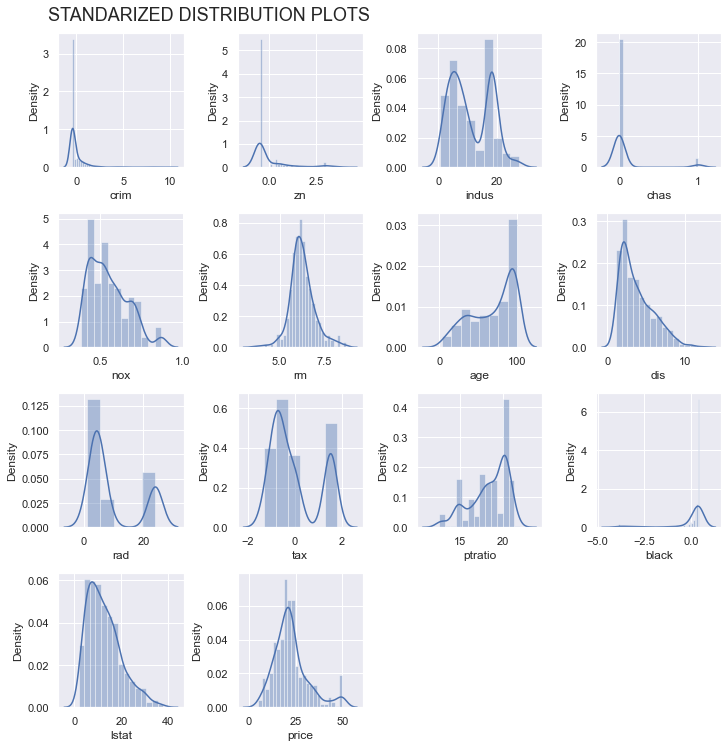

In [13]:
# Updated distribution plots with Standarized columns ['crim', 'zn', 'tax', 'black']

sns.set_theme()
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(11, 11))

index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

ax[14].set_visible(False)
ax[15].set_visible(False)

plt.tight_layout(pad=3.5, w_pad=0.7, h_pad=1.0)
fig.suptitle('STANDARIZED DISTRIBUTION PLOTS\n', fontsize=18, x=0.3)
plt.show()


# Correlation Matrix

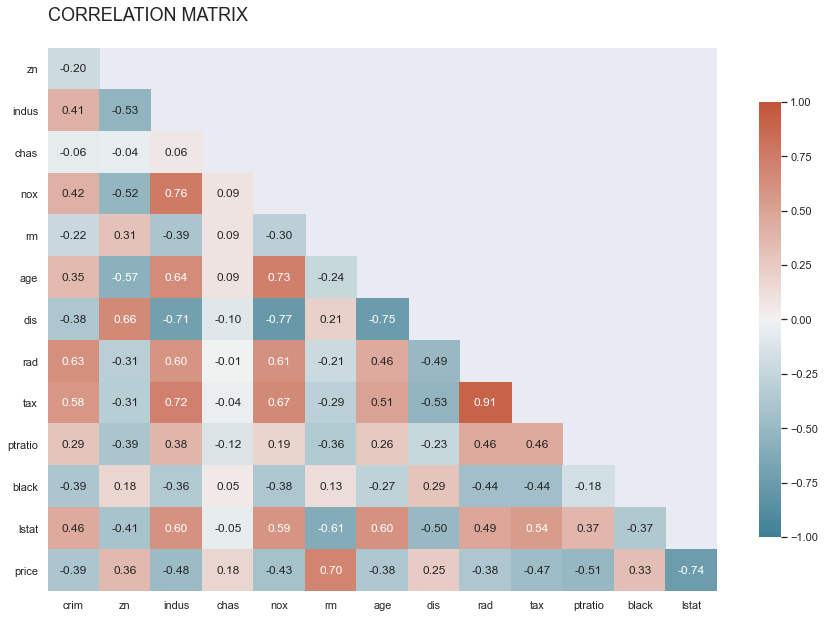

In [14]:
plt.figure(figsize=(15,10))

# get correlations
corr = df.corr()

# mask
np.ones_like(corr, dtype=np.bool)
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)


# plot heatmap
ax = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# yticks
plt.yticks(rotation=0)

# xticks 
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center'
)

# title
title = 'CORRELATION MATRIX\n'
plt.title(title, loc='left', fontsize=18)
plt.show();


# Training/Test Split

In [15]:
# Data (features)
X = df.iloc[:,0:13] 

# target ('price')
y = df.iloc[:,-1] 

# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle=True,
                                                    test_size=0.2, 
                                                    random_state=42)


# Setup

In [16]:

from sklearn.metrics import mean_squared_error

def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse
    raise NotImplementedError()
    
def calc_test_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse
    raise NotImplementedError()
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    
    model.fit(X_train, y_train)
    
    train_error = calc_train_error(X_train, y_train, model)
    test_error = calc_test_error(X_test, y_test, model)
    
    print('ORIGINAL ERROR (RMSE)')
    print('-' * 40)   
    print(f'train error: {train_error:.2f} | test error: {test_error:.2f}'.format(train_error, test_error))
    print('train/test:  {}'.format(round(train_error/test_error, 2)))
    
    return train_error, test_error
        

# Linear Regression


## Model Fitting

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
calc_metrics(X_train, y_train, X_test, y_test, model)


ORIGINAL ERROR (RMSE)
----------------------------------------
train error: 4.65 | test error: 4.93
train/test:  0.94


(4.6520331848801675, 4.928602182665333)

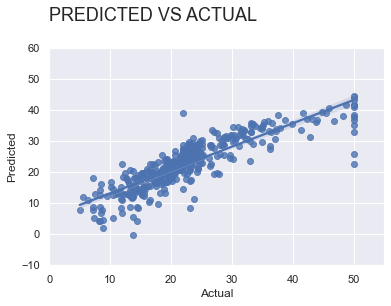

In [18]:
# Original

y_pred = model.predict(X_train)

sns.set_theme()
sns.regplot(y_train, y_pred)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.ylim(-10, 60)
plt.xlim(0, 55)

# title
title = 'PREDICTED VS ACTUAL\n'
plt.title(title, loc='left', fontsize=18)
plt.show()



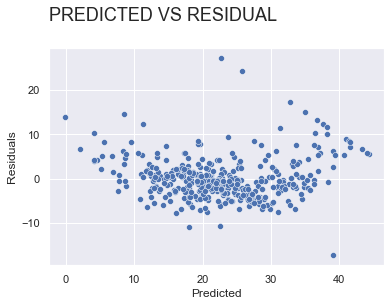

In [19]:
# Original

sns.scatterplot(y_pred,y_train-y_pred)

plt.xlabel("Predicted")
plt.ylabel("Residuals")

# title
title = 'PREDICTED VS RESIDUAL\n'
plt.title(title, loc='left', fontsize=18)
plt.show() 

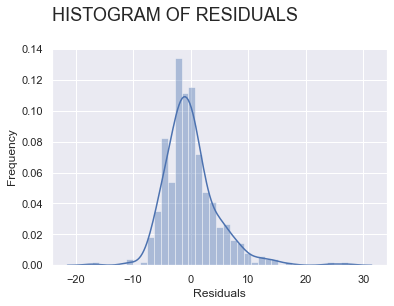

In [20]:
# Original

sns.distplot(y_train-y_pred)

plt.xlabel("Residuals")
plt.ylabel("Frequency")

# title
title = 'HISTOGRAM OF RESIDUALS\n'
plt.title(title, loc='left', fontsize=18)
plt.show() 

## Validation Set

In [21]:
# test set
X_int, X_test, y_int, y_test = train_test_split(X,
                                                y, 
                                                shuffle=True,
                                                test_size=0.2, 
                                                random_state=42)

# validation and train sets
X_train, X_validation, y_train, y_validation = train_test_split(X_int,
                                                                y_int,
                                                                shuffle=False,
                                                                test_size=0.25,
                                                                random_state=42)


## Removing Intermediate Variables

In [22]:
# Remove intermediate variables
del X_int, y_int


# dataset proportions
print('Dataset proportions:')
print('-'*42)
print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(y),2),
                                                       round(len(y_validation)/len(y),2),
                                                       round(len(y_test)/len(y),2)))


Dataset proportions:
------------------------------------------
train: 0.6% | validation: 0.2% | test 0.2%


## Data Shape: Training, Validation, Test 

In [23]:
# data shape

print('Data shape:')
print('-'*20)
print('training:  ', X_train.shape)
print('validation:', X_validation.shape)
print('test:      ', X_test.shape)


Data shape:
--------------------
training:   (303, 13)
validation: (101, 13)
test:       (102, 13)


## Updated Functions for Ridge Regression

In [24]:

from sklearn.metrics import mean_squared_error

def calc_new_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse
    raise NotImplementedError()
    
def calc_new_test_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse
    raise NotImplementedError()

def calc_metrics_2(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    new_train_error = calc_new_train_error(X_train, y_train, model)
    new_test_error = calc_new_test_error(X_test, y_test, model)
    
    print('ERROR w/REGULARIZATION (RMSE)')
    print('-'*36)
    print(f'train error: {new_train_error:.2f} | test error: {new_test_error:.2f}'.format(new_train_error, new_test_error))
    print('train/test:  {}'.format(round(new_train_error/new_test_error, 2)))

    return new_train_error, new_test_error 


## Finding the best alpha

In [25]:
from sklearn.linear_model import Ridge

'''
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify stronger regularization.
    Alpha corresponds to ``1 / (2C)`` in other linear models such as
    :class:`~sklearn.linear_model.LogisticRegression` or
    :class:`sklearn.svm.LinearSVC`. If an array is passed, penalties are
    assumed to be specific to the targets. Hence they must correspond in
    number.
'''

alphas = [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]
print('RMSE')
print('-'*77)

for alpha in alphas:
    
    # instantiate and fit model
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=42)
    ridge.fit(X_train, y_train)
   
    # calculate errors
    new_train_error = mean_squared_error(y_train, ridge.predict(X_train))
    new_validation_error = mean_squared_error(y_validation, ridge.predict(X_validation))
    new_test_error = mean_squared_error(y_test, ridge.predict(X_test))
    
    # print errors as report
    print('alpha: {:7} | train error: {:7} | val error: {:7} | test error: {}'.
          format(alpha,
                 round(new_train_error,3),
                 round(new_validation_error,3),
                 round(new_test_error,3)))
    

RMSE
-----------------------------------------------------------------------------
alpha:       0 | train error:  21.643 | val error:  22.279 | test error: 24.108
alpha:  0.0001 | train error:  21.643 | val error:  22.279 | test error: 24.108
alpha:   0.001 | train error:  21.643 | val error:   22.28 | test error: 24.108
alpha:    0.01 | train error:  21.643 | val error:  22.285 | test error: 24.111
alpha:     0.1 | train error:  21.651 | val error:  22.335 | test error: 24.144
alpha:     0.5 | train error:  21.739 | val error:  22.545 | test error: 24.302
alpha:       1 | train error:  21.856 | val error:  22.741 | test error: 24.456
alpha:       5 | train error:  22.254 | val error:  23.285 | test error: 24.777
alpha:      10 | train error:  22.445 | val error:  23.508 | test error: 24.756


## Updated Model using Ridge Regression

In [26]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle=True,
                                                    test_size=0.2, 
                                                    random_state=42)


model = Ridge(alpha=0.001, fit_intercept=True, random_state=42)

# fit and calculate errors
new_train_error, new_test_error = calc_metrics_2(X_train, y_train, X_test, y_test, model)
new_train_error, new_test_error = round(new_train_error, 3), round(new_test_error, 3)


ERROR w/REGULARIZATION (RMSE)
------------------------------------
train error: 4.65 | test error: 4.93
train/test:  0.94


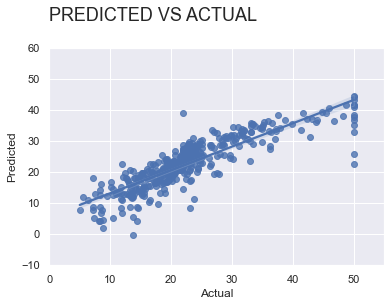

In [27]:
# updated
 
y_pred_2 = model.predict(X_train)

sns.set_theme()
sns.regplot(y_train, y_pred_2)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.ylim(-10, 60)
plt.xlim(0, 55)

# title
title = 'PREDICTED VS ACTUAL\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

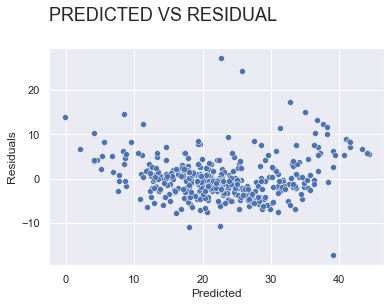

In [28]:
# updated
sns.scatterplot(y_pred,y_train-y_pred_2)

plt.xlabel("Predicted")
plt.ylabel("Residuals")


# title
title = 'PREDICTED VS RESIDUAL\n'
plt.title(title, loc='left', fontsize=18)
plt.show() 

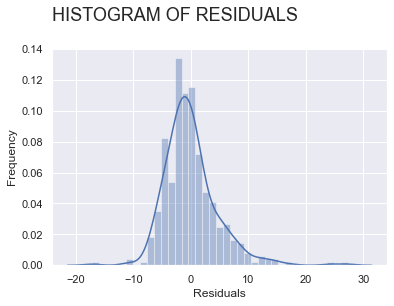

In [29]:
# updated
 
sns.distplot(y_train-y_pred_2)

plt.xlabel("Residuals")
plt.ylabel("Frequency")

# title
title = 'HISTOGRAM OF RESIDUALS\n'
plt.title(title, loc='left', fontsize=18)
plt.show() 

# Evaluating Additional Models

In [30]:
from sklearn.metrics import mean_squared_error

def calc_new_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse
    raise NotImplementedError()
    
def calc_new_test_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse
    raise NotImplementedError()

def calc_metrics_3(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    new_train_error = calc_new_train_error(X_train, y_train, model)
    new_test_error = calc_new_test_error(X_test, y_test, model)
    
    print('ERRORS (RMSE)')
    print('-'*36)
    print(f'train error: {new_train_error:.2f} | test error: {new_test_error:.2f}'.format(new_train_error, new_test_error))
    print('train/test:  {}'.format(round(new_train_error/new_test_error, 2)))

    

## Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
calc_metrics_3(X_train, y_train, X_test, y_test, model)

ERRORS (RMSE)
------------------------------------
train error: 1.45 | test error: 2.86
train/test:  0.51


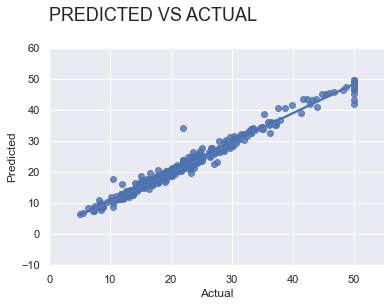

In [32]:
# updated

y_pred_2 = model.predict(X_train)

sns.set_theme()
sns.regplot(y_train, y_pred_2)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.ylim(-10, 60)
plt.xlim(0, 55)

# title
title = 'PREDICTED VS ACTUAL\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

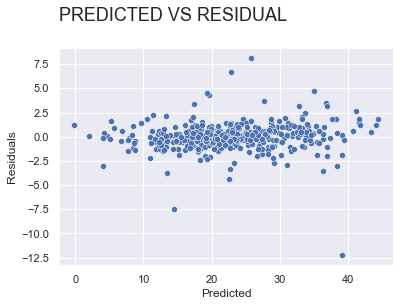

In [33]:
# updated

sns.scatterplot(y_pred,y_train-y_pred_2)

plt.xlabel("Predicted")
plt.ylabel("Residuals")


# title
title = 'PREDICTED VS RESIDUAL\n'
plt.title(title, loc='left', fontsize=18)
plt.show() 

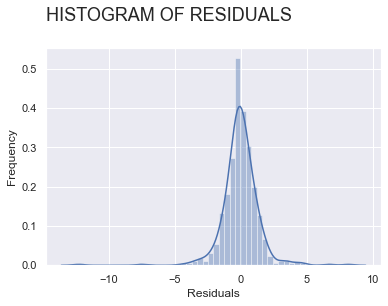

In [34]:
# updated
 
sns.distplot(y_train-y_pred_2)

plt.xlabel("Residuals")
plt.ylabel("Frequency")

# title
title = 'HISTOGRAM OF RESIDUALS\n'
plt.title(title, loc='left', fontsize=18)
plt.show() 

## XGBoost

In [35]:
import xgboost as xgb
model = xgb.XGBRegressor()
calc_metrics_3(X_train, y_train, X_test, y_test, model)

ERRORS (RMSE)
------------------------------------
train error: 0.02 | test error: 2.56
train/test:  0.01


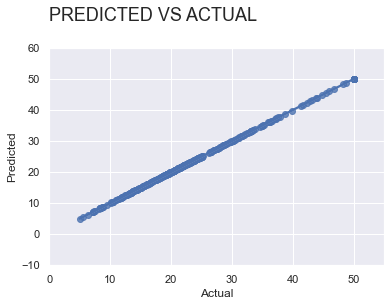

In [36]:
# updated

y_pred_2 = model.predict(X_train)

sns.set_theme()
sns.regplot(y_train, y_pred_2)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.ylim(-10, 60)
plt.xlim(0, 55)

# title
title = 'PREDICTED VS ACTUAL\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

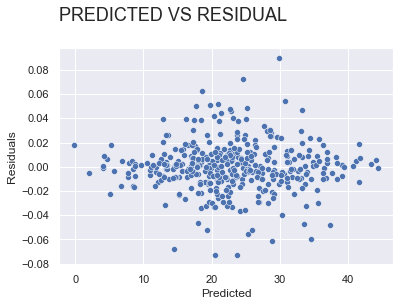

In [37]:
# updated

sns.scatterplot(y_pred,y_train-y_pred_2)

plt.xlabel("Predicted")
plt.ylabel("Residuals")


# title
title = 'PREDICTED VS RESIDUAL\n'
plt.title(title, loc='left', fontsize=18)
plt.show() 

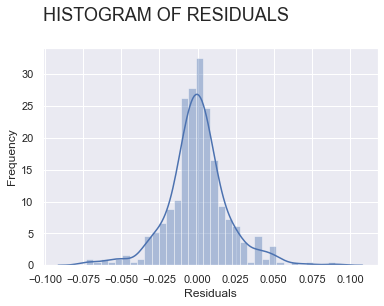

In [38]:
# updated

sns.distplot(y_train-y_pred_2)

plt.xlabel("Residuals")
plt.ylabel("Frequency")

# title
title = 'HISTOGRAM OF RESIDUALS\n'
plt.title(title, loc='left', fontsize=18)
plt.show() 

# Remarks

-	The data was initially evaluated using a linear regression model.
-	Ridge regression did not improve the model.
-	Random forest regressor performed better than the linear regression model.
-	However, the extreme gradient boosting (XGBoost regressor) outperformed the random forest regressor model.
-	Therefore, the model with the best performance was the XGBoost regressor from the models evaluated in this exercise.
